### assignment 16 pizza sales exercise
### Kartik thakur

#### PIZZA RESTAURANT SALES 

This pizza sales dataset make up 12 relevant features:

     
1- Order_id: Unique identifier for each order placed by a table
     
2- Order_details_id: Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)
     
3- Pizza_id: Unique key identifier that ties the pizza ordered to its details, like size and price
     
4- Quantity: Quantity ordered for each pizza of the same type and size
     
5- Order_date: Date the order was placed (entered into the system prior to cooking & serving)
     
6- Order_time: Time the order was placed (entered into the system prior to cooking & serving)
     
7- Unit_price: Price of the pizza in USD
     
8- Total_price: unit_price * quantity
     
9- Pizza_size: Size of the pizza (Small, Medium, Large, X Large, or XX Large)
     
10- Pizza_type: Unique key identifier that ties the pizza ordered to its details, like size and price
     
11- Pizza_ingredients: ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)
     
12- Pizza_name: Name of the pizza as shown in the menu
 

Here are some questions that we'd like to be able to answer:

1. What days and times do we tend to be busiest?
2. How many pizzas are we making during peak periods?
3. What are our best and worst-selling pizzas?
4. What's our average order value?
5. How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)

##### Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px

#### Loading Dataset


In [4]:
pizza=pd.read_csv('pizza_sales.csv')
pizza.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


### Exploratory Some Information About Dataset


In [5]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [6]:
pizza.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [7]:
pizza.shape

(48620, 12)

In [8]:
pizza.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [9]:
pizza.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

#### Change the hour object into integer  

In [10]:
pizza["order_time"] = pizza["order_time"].astype("string")
pizza[["hour","minute","second"]] = pizza["order_time"].str.split(":",expand=True)
pizza["hour"].value_counts()

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: hour, dtype: Int64

### Data Visualization


### Q1. Plot the graph between hour and sales

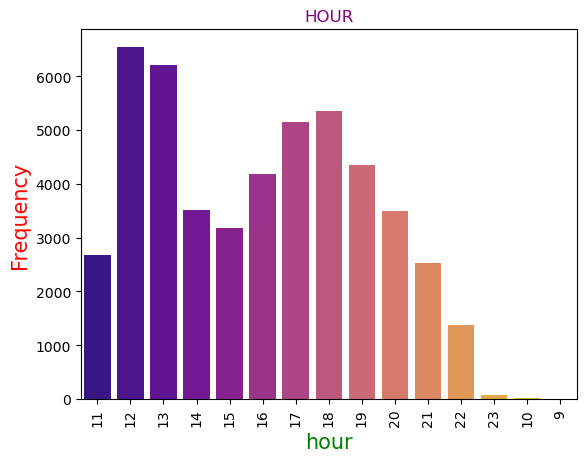

In [11]:
sns.countplot(data=pizza,x="hour",palette="plasma")
plt.xticks(rotation=90)
plt.xlabel("hour",fontsize=15,color="green")
plt.ylabel("Frequency",fontsize=15,color="red")
plt.title("HOUR",color="purple")
plt.show()

### Q2. Find the total order in a year

In [12]:
pizza['order_year'] =pd.DatetimeIndex( pizza['order_date']).year
pizza['order_year'].value_counts()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent pars

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13/12/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14/12/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15/12/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16/12/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent pars

2015    48620
Name: order_year, dtype: int64

### Q3. Find The day-wise sales

In [13]:
pizza['order_date'] = pd.to_datetime(pizza['order_date'])
pizza['order_date']

C:\Users\user\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/10/2015' in DD/MM/YYYY format. Provide format or specify in

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
48615   2015-12-31
48616   2015-12-31
48617   2015-12-31
48618   2015-12-31
48619   2015-12-31
Name: order_date, Length: 48620, dtype: datetime64[ns]

In [14]:
pizza['order_dates'] = pizza['order_date'].dt.day_name()
pizza['order_dates'].value_counts()

Friday       7723
Saturday     7274
Thursday     7243
Wednesday    6907
Tuesday      6833
Monday       6577
Sunday       6063
Name: order_dates, dtype: int64

### Plot the graph for day-wise sales

In [15]:
palette="viridis"

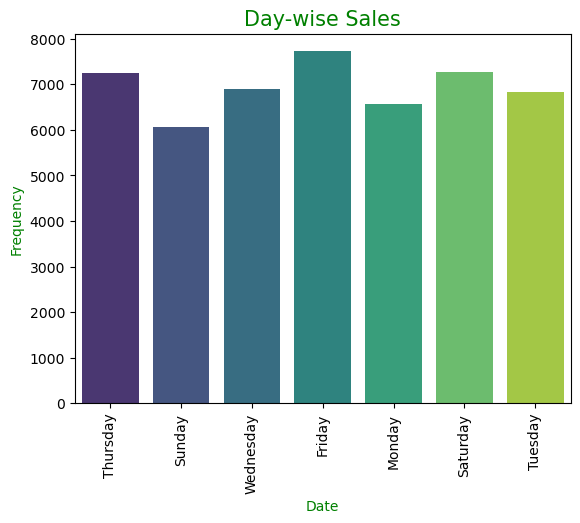

In [16]:
sns.countplot(data=pizza,x="order_dates",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Date",fontsize=10,color="green")
plt.ylabel("Frequency",fontsize=10,color="green")
plt.title("Day-wise Sales",color="green",fontsize=15)
plt.show()

### Q4. Find Monthly sales

In [17]:
pizza['order_month'] =pd.DatetimeIndex (pizza['order_date']).month
pizza.loc[(pizza['order_month'] ==1), 'order_month'] = 'January'
pizza.loc[(pizza['order_month'] ==2), 'order_month'] = 'February'
pizza.loc[(pizza['order_month'] ==3), 'order_month'] = 'March'
pizza.loc[(pizza['order_month'] ==4), 'order_month'] = 'April'
pizza.loc[(pizza['order_month'] ==5), 'order_month'] = 'May'
pizza.loc[(pizza['order_month'] ==6), 'order_month'] = 'June'
pizza.loc[(pizza['order_month'] ==7), 'order_month'] = 'July'
pizza.loc[(pizza['order_month'] ==8), 'order_month'] = 'August'
pizza.loc[(pizza['order_month'] ==9), 'order_month'] = 'September'
pizza.loc[(pizza['order_month'] ==10), 'order_month'] = 'October'
pizza.loc[(pizza['order_month'] ==11), 'order_month'] = 'November'
pizza.loc[(pizza['order_month'] ==12), 'order_month'] = 'December'
pizza['order_month'].value_counts()

January      4288
March        4251
November     4226
July         4212
April        4182
August       4141
October      4045
June         4044
May          4008
February     3821
September    3780
December     3622
Name: order_month, dtype: int64

In [18]:
pizza.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,hour,minute,second,order_year,order_dates,order_month
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,38,36,2015,Thursday,January
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11,57,40,2015,Thursday,January
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,11,57,40,2015,Thursday,January
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,11,57,40,2015,Thursday,January
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,11,57,40,2015,Thursday,January


### Plot graph for monthly sales

In [19]:
palette="CMRmap"

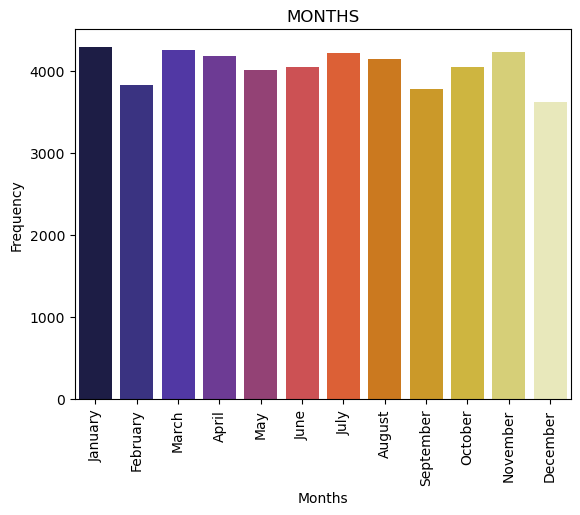

In [47]:
sns.countplot(data=pizza,x="order_month",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Months",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("MONTHS",color="black")
plt.show()

#### Find which pizza has highest sales

In [48]:
pizza.pizza_id.value_counts()

big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: pizza_id, Length: 91, dtype: int64

In [49]:
palette="tab20b_r"

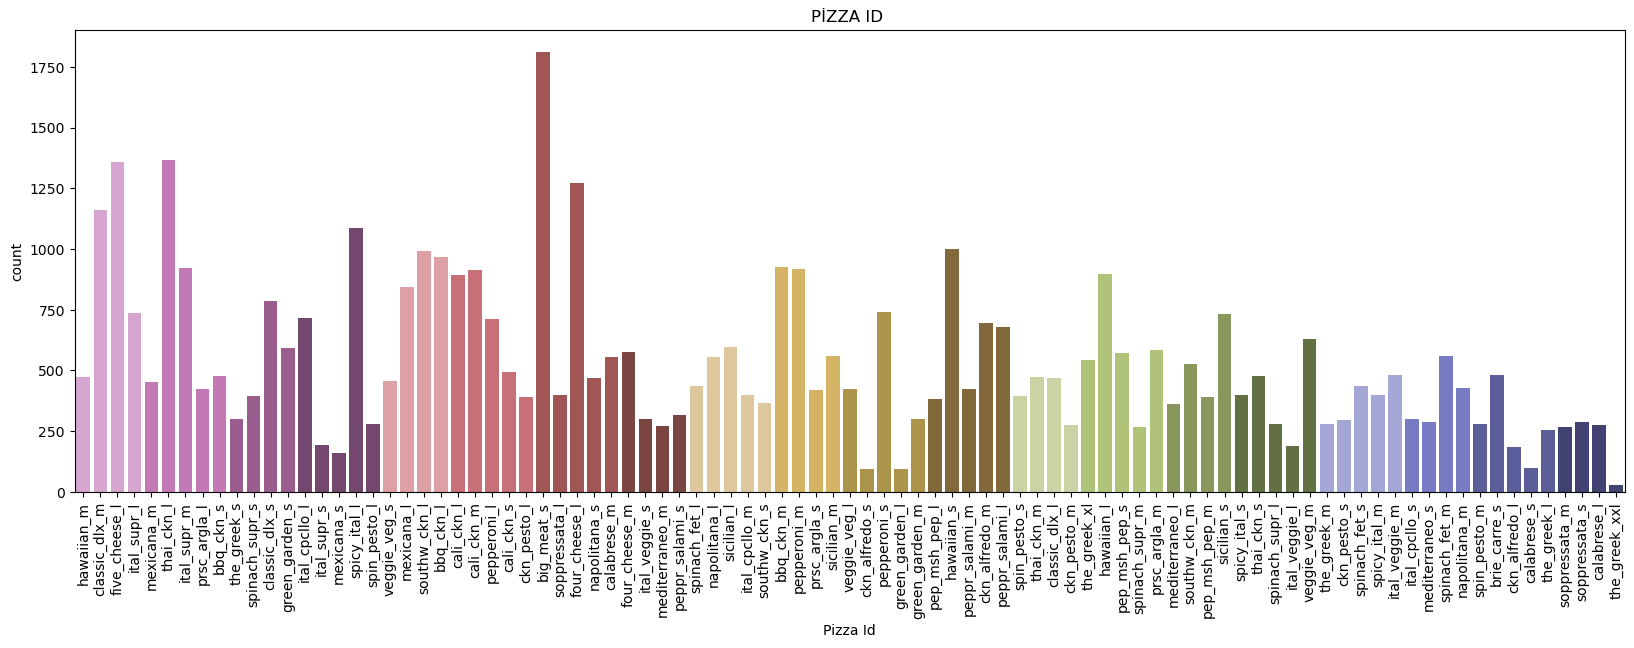

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(data=pizza,x="pizza_id",palette="tab20b_r",ax=ax)
plt.xticks(rotation=90)
plt.xlabel("Pizza Id",fontsize=10,color="black")
plt.title("PİZZA ID ",color="black")
plt.show()

#### How much quantity of pizzas ordered more.

In [24]:
pizza.quantity.value_counts()

1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64

In [25]:
palette="Set1"

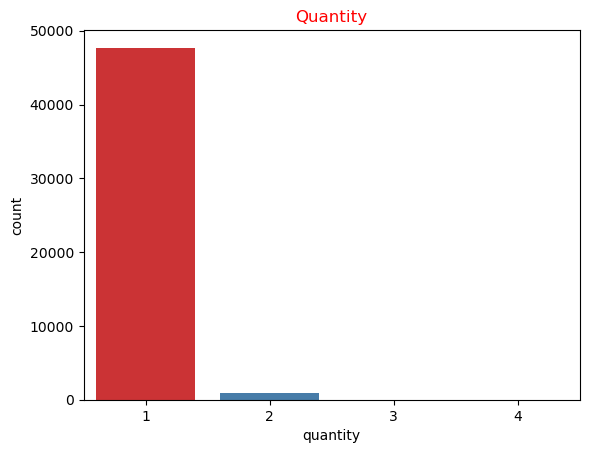

In [26]:
sns.countplot(data=pizza,x="quantity",palette="Set1")
plt.xlabel("quantity",fontsize=10)
plt.title("Quantity",color="red")
plt.show()

### Which pizza size sales has less in number

In [27]:
pizza.pizza_size.value_counts().sort_values()

XXL       28
XL       544
S      14137
M      15385
L      18526
Name: pizza_size, dtype: int64

In [28]:
palette="coolwarm_r"

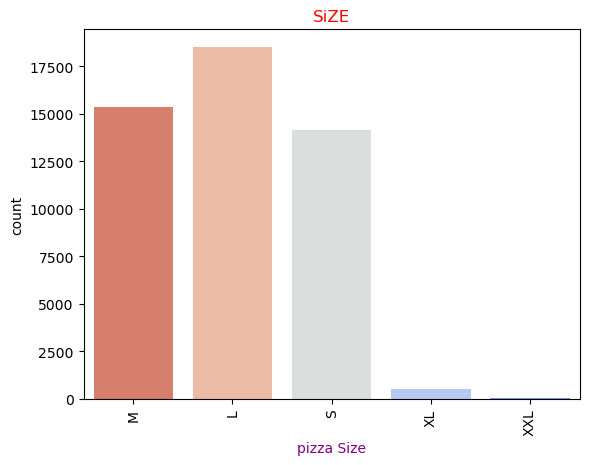

In [29]:
sns.countplot(data=pizza,x="pizza_size",palette="coolwarm_r")
plt.xticks(rotation=90)
plt.xlabel("pizza Size",fontsize=10,color='purple')
plt.title("SiZE",color="red")
plt.show()

### Plot the piechart with percentage sales of pizza size

In [30]:
colors = ['#ff9749','#66b3f1','#999f99','#ffcc09',"RED","cyan"]

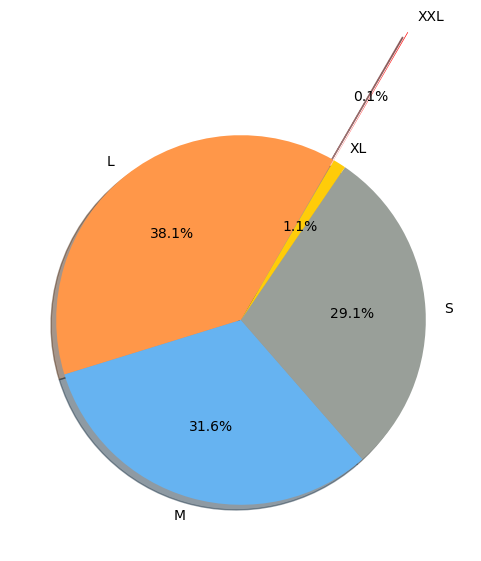

In [31]:
labels = pizza["pizza_size"].value_counts().index
sizes = pizza["pizza_size"].value_counts()
plt.figure(figsize = (6,6))

colors = ['#ff9749','#66b3f1','#999f99','#ffcc09',"RED","cyan"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, 
        startangle=60,explode=(0,0,0,0,0.8))
plt.show()

### Find which category of pizza ordered most

In [32]:
pizza.pizza_category.value_counts()

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64

In [33]:
palette="Oranges"

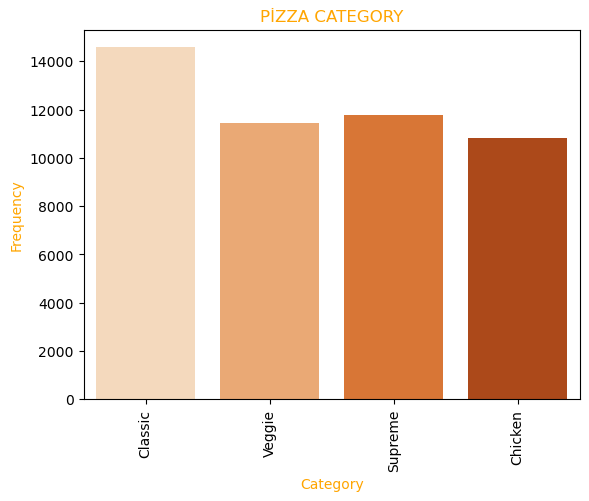

In [34]:
sns.countplot(data=pizza,x="pizza_category",palette="Oranges")
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=10,color="orange")
plt.ylabel("Frequency",fontsize=10,color="orange")
plt.title("PİZZA CATEGORY",color="orange")
plt.show()

#### Plot the piechart which shows the percentage of sales

In [35]:
colors = ['#ff9999','#66b3ff','#990f99','#ffcc89',"pink","yellow"]

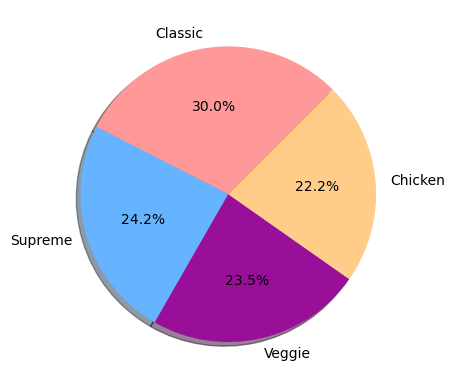

In [36]:
labels = pizza["pizza_category"].value_counts().index
sizes = pizza["pizza_category"].value_counts()
colors = ['#ff9999','#66b3ff','#990f99','#ffcc89',"pink","yellow"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.show()

### Get the value counts for pizza ingredients

In [37]:
pizza.pizza_ingredients.value_counts()

Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2416
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2372
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2370
Mozzarella Cheese, Pepperoni                                                                         2369
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   2315
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  2302
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                     1887
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1887
Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce         1885
Ricotta Cheese, Gorgonzola Piccante Cheese, Mo

### Find Total Money Earned From Pizza Categories and also plot pie chart

In [67]:
z=pizza['pizza_category'].value_counts()
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'pizza_category','y':'total_price','text':'total_price'},template='ggplot2',title='<b>Total Money Earned From Pizza Categories and Pie chart</b> ')
fig.show()
fig=px.pie(z,names=z.index,values=z.values,labels={'index':'pizza_category','y':'total_price','text':'total_price'},template='ggplot2')
fig.show()

### Day-wise orders placed in every month

In [51]:
palette="pastel"

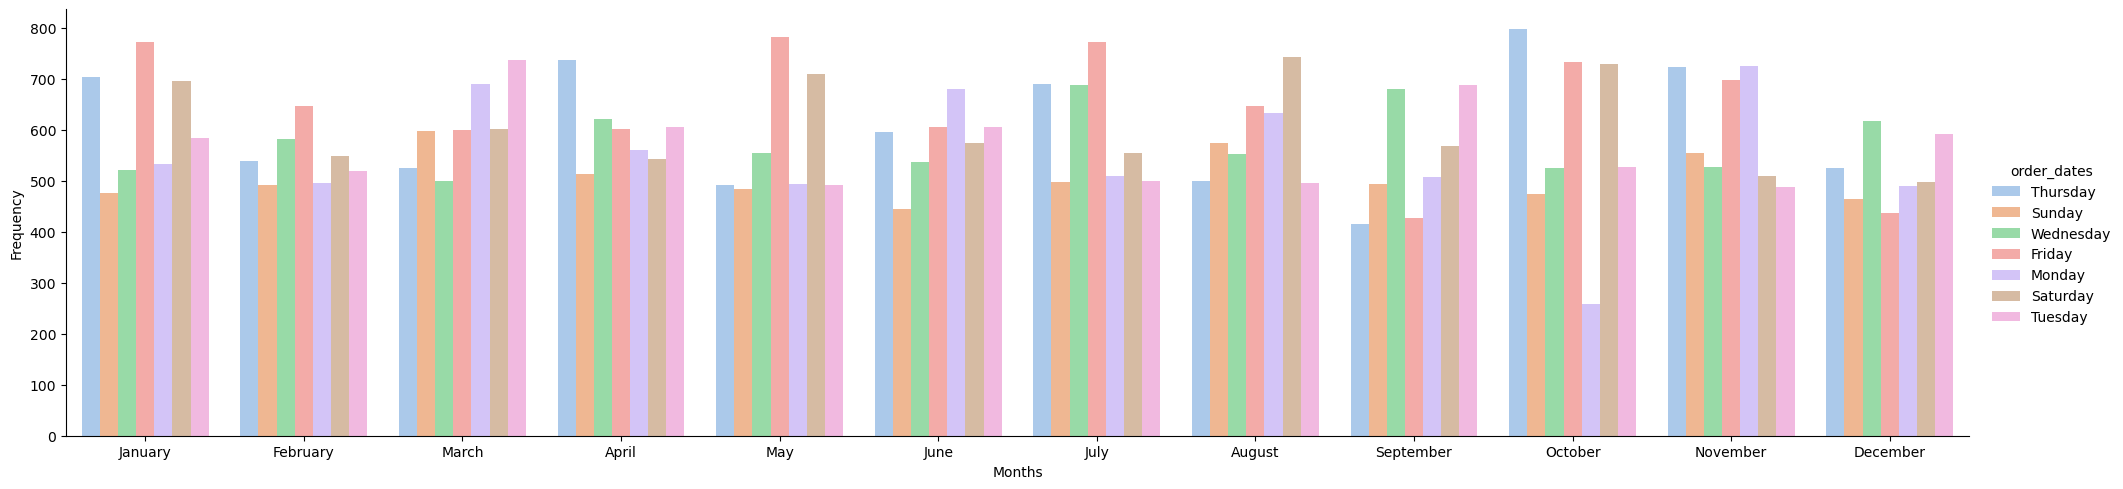

In [52]:
g = sns.catplot(x="order_month", data=pizza, aspect=4.0, kind='count',hue='order_dates',palette="pastel")
g.set_ylabels('Frequency')
g.set_xlabels("Months")
plt.show()

### Daily hour-wise sales of pizza

In [53]:
color=["blue","red","green","yellow","magenta","cyan","black","orange"]

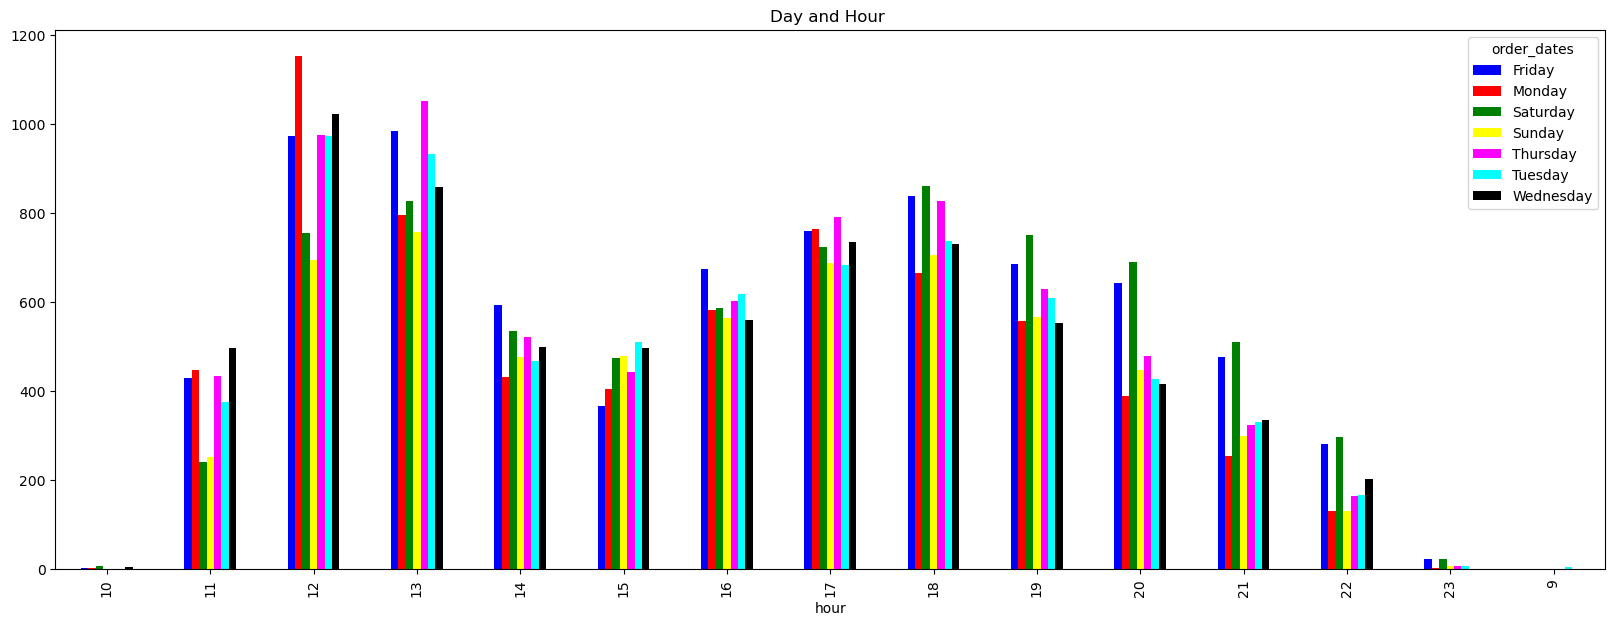

In [54]:
pd.crosstab(pizza["hour"], pizza["order_dates"]).plot(kind="bar", figsize=(20,7),
                                                color=["blue","red","green","yellow","magenta","cyan","black","orange"],
                                                title="Day and Hour ")
plt.show()

### Which pizza size earns more money

In [55]:
pizzaEarn = pizza.groupby('pizza_size')['total_price'].sum()
pizzaEarn

pizza_size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: total_price, dtype: float64

In [56]:
profitable_Pizza = pizzaEarn.idxmax()
print("The most profitable pizza size is:", profitable_Pizza)


The most profitable pizza size is: L


### Answers of the following question

    
1. What days and times do we tend to be busiest?
2. How many pizzas are we making during peak periods?
3. What are our best and worst-selling pizzas?
4. What's our average order value?
5. How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)

## Ques 1. What days and times do we tend to be busiest?

#### Answer:The day in which we tend to be busiest is :FRIDAY and the time is between 12-13 PM

## Ques 2. How many pizzas are we making during peak periods?

In [57]:
# Taking busiest times as Peak Periods
peakPeriods=pizza["hour"].value_counts().head(2)
total_pizzas_ordered=peakPeriods.values.sum()
print(f'During peak periods, we are making {total_pizzas_ordered} pizzas in total.')

During peak periods, we are making 12746 pizzas in total.


### Answer During peak periods, we are making 37054 pizzas in total

## Ques 3. What are our best and worst-selling pizzas?

In [58]:
c = pizza.groupby('pizza_name')['quantity'].sum().reset_index()

best = c.loc[c['quantity'].idxmax()]['pizza_name']
worst = c.loc[c['quantity'].idxmin()]['pizza_name']
print(f'Our best-selling pizza is {best}, and our worst-selling pizza is {worst}.')

Our best-selling pizza is The Classic Deluxe Pizza, and our worst-selling pizza is The Brie Carre Pizza.


#### Answer Our best-selling pizza is The Classic Deluxe Pizza, and our worst-selling pizza is The Brie Carre Pizza.

## Ques 4. What's our average order value?

In [59]:
average_order_value = pizza['total_price'].sum() / pizza['order_id'].nunique()
print(f'Our average order value is ${average_order_value:.2f}.')

Our average order value is $38.31.


### Answer Our average order value is $38.31.

## Ques 5. How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)

In [60]:
table=15
seats=60

In [61]:
seats_per_table=seats/table
seats_per_table

4.0

In [62]:
z=pizza['hour'].value_counts()
z

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: hour, dtype: Int64

In [63]:
x=z.values/seats
util=(x.max()/seats)*100
util

181.75

#### Hence we can say that At Peak periods 109 people per seat are eating. So, At such a time seat Utilization is : 181.75%